In [1]:
#Imports y herramientas varias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pnd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor

In [2]:
#Importar datos originales
path = "Datos/"

clientes = pnd.read_excel(path + "CREDITRISK_RAW.xlsx")

In [8]:
#Exploración de atributos
for key in clientes.keys():
    print "Atributo:", key
    print "\tTipo:", clientes[key].dtype

Atributo: ID
	Tipo: int64
Atributo: GENERO
	Tipo: object
Atributo: RENTA
	Tipo: float64
Atributo: EDAD
	Tipo: float64
Atributo: NIV_EDUC
	Tipo: object
Atributo: E_CIVIL
	Tipo: object
Atributo: COD_OFI
	Tipo: int64
Atributo: COD_COM
	Tipo: object
Atributo: CIUDAD
	Tipo: object
Atributo: Crédito_1
	Tipo: int64
Atributo: Crédito_2
	Tipo: int64
Atributo: Crédito_3
	Tipo: float64
Atributo: Crédito_4
	Tipo: int64
Atributo: Monto solicitado
	Tipo: float64
Atributo: Días de Mora
	Tipo: int64
Atributo: Monto Deuda Promedio
	Tipo: int64
Atributo: Número de meses inactivo
	Tipo: int64
Atributo: numero de cuotas
	Tipo: int64
Atributo: Aval
	Tipo: object
Atributo: PAGA
	Tipo: object


In [4]:
#Extracción de clientes con algún dato en blanco
empty_attribute_clients = clientes[clientes.isnull().any(axis=1)]
clean_clients = clientes[~clientes.isnull().any(axis=1)]

In [5]:
print len(clientes)
print len(clean_clients)
print len(empty_attribute_clients)

2294
2240
54


In [11]:
llaves = clean_clients.keys()

for j in range(len(llaves)):
    if clean_clients[llaves[j]].dtype == 'int64' or clean_clients[llaves[j]].dtype == 'float64':
        continue
    if llaves[j] in ['id']:
        continue
    values = clean_clients[llaves[j]].unique()
    dic = {}
    for i in range(len(values)):
        dic[values[i]] = i
    print "Translation:"
    print ""

    clean_clients[llaves[j]] = clean_clients[llaves[j]].apply(lambda x: dic[x])

#Paga: 0, No Paga: 1

/Users/synaptic/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [27]:
clean_clients

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,Número de meses inactivo,numero de cuotas,Aval,PAGA
0,1,0,463000.0,55.0,0,0,27,0,0,0,-4030,0.0,292673,142.0,0,81,1,18,0,0
1,2,0,1200000.0,59.0,0,0,121,0,0,0,0,27797549.0,0,16.0,0,34519,1,60,0,1
2,3,0,526000.0,49.0,1,1,59,1,1,0,750000,0.0,0,0.0,0,8016,0,14,0,1
3,4,1,1500000.0,47.0,2,1,138,2,2,0,976444,0.0,0,13.0,10,25323,1,66,0,0
4,5,1,2600000.0,41.0,2,0,60,3,3,0,115440,0.0,4500000,7960.0,14,4566,3,77,1,1
5,6,0,1250000.0,30.0,0,2,63,4,4,0,799000,0.0,0,147.0,0,0,1,55,0,1
6,7,1,724000.0,47.0,2,0,138,2,2,0,500000,0.0,1963,0.0,0,2,1,24,0,0
7,8,1,1196000.0,53.0,2,0,27,0,0,0,0,0.0,0,0.0,4,0,1,60,0,0
8,9,0,510000.0,39.0,0,0,96,5,5,0,1050000,0.0,279914,305.0,0,0,1,10,0,1
9,10,1,685000.0,51.0,2,0,82,6,1,0,164272,0.0,99401,114.0,0,1152,1,26,0,0


In [28]:
#Guardar dataset limpio en nuevo archivo excel para análisis con tableau o excel
clean_clients.to_excel(path + "limpio.xlsx")

In [30]:
clients_copy = clean_clients.copy()

y = clients_copy['PAGA']
del clients_copy['PAGA']

X = clients_copy.copy()

In [34]:
clf = tree.DecisionTreeClassifier()

cross_val_score(clf, X, y, cv=5)

array([0.92427617, 0.92633929, 0.89732143, 0.91517857, 0.91946309])

In [36]:
clf = RandomForestClassifier(criterion='entropy')
clf.fit(X, y)

print("Random forest:\n")
for i in range(len(X.keys())):
    print X.keys()[i], ':', clf.feature_importances_[i]
    

Random forest:

ID : 0.026004500233361687
GENERO : 0.10091819580653696
RENTA : 0.04942412781535481
EDAD : 0.15246191464038675
NIV_EDUC : 0.053251111326339494
E_CIVIL : 0.03618292700437582
COD_OFI : 0.05980430748658918
COD_COM : 0.06691967319658908
CIUDAD : 0.21404157428679915
Crédito_1 : 0.008243505016761469
Crédito_2 : 0.03031304241381927
Crédito_3 : 0.00048239148766152996
Crédito_4 : 0.03665600669285078
Monto solicitado : 0.039829650303771294
Días de Mora : 0.010778756518473442
Monto Deuda Promedio : 0.01788821705836365
Número de meses inactivo : 0.0580570595133668
numero de cuotas : 0.03217497520634024
Aval : 0.006568063992258603


In [38]:
mutual_info=mutual_info_classif(X, y)

print('Mutual information ingresos')
for i in range(len(X.keys())):
    print X.keys()[i], ':', mutual_info[i]

Mutual information ingresos
ID : 0.006565402129131703
GENERO : 0.13294132915431467
RENTA : 0.02675691202731878
EDAD : 0.20650880189648047
NIV_EDUC : 0.12570163741006057
E_CIVIL : 0.04997396838957591
COD_OFI : 0.2737130373151071
COD_COM : 0.2916549385763576
CIUDAD : 0.21618783275913245
Crédito_1 : 0.04152624909597025
Crédito_2 : 0.0788186168393783
Crédito_3 : 0.0
Crédito_4 : 0.054265298604822654
Monto solicitado : 0.07090092323658848
Días de Mora : 0.01148947189045546
Monto Deuda Promedio : 0.07244383179789615
Número de meses inactivo : 0.09473784514738903
numero de cuotas : 0.009192777989763146
Aval : 0.022729835732440806


In [ ]:
#Clustering aglomerativo jerarquico
#ward, complete
matrix = linkage(X, method='ward')

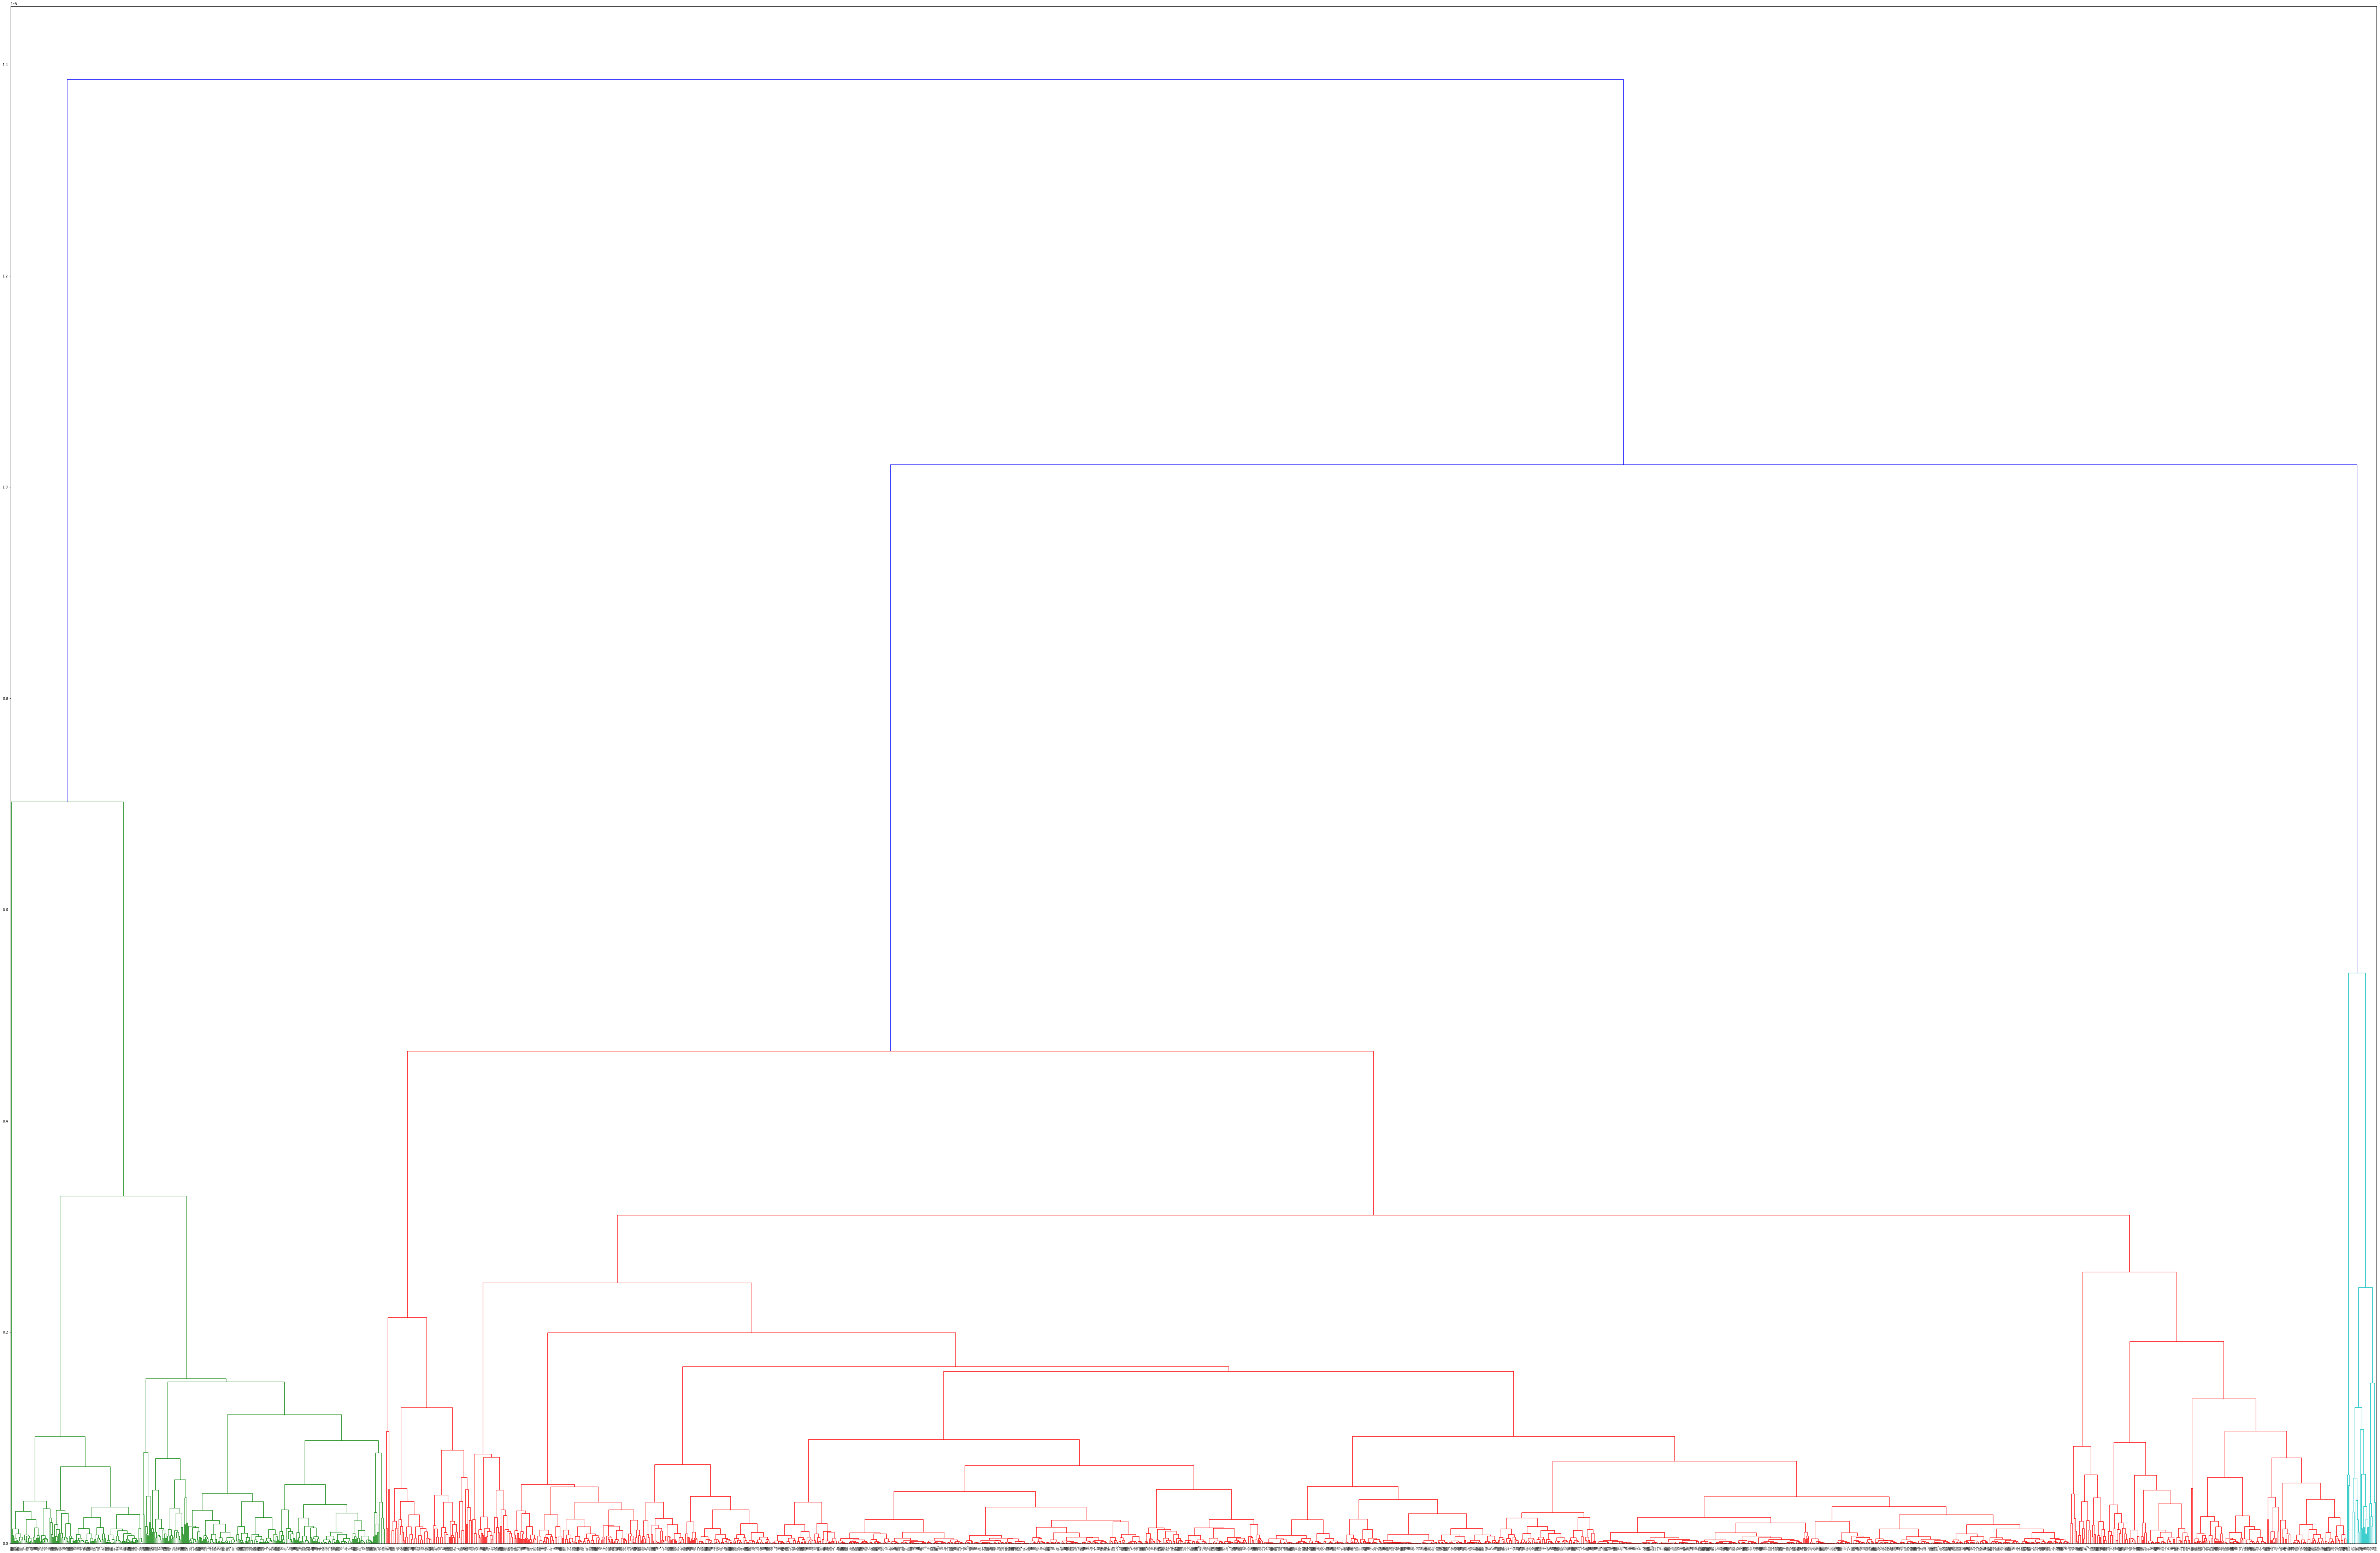

In [50]:
#Grafico del dendograma
plt.figure(figsize=(120, 80))
dendrogram(matrix)
plt.show()

In [ ]:
#Formacion de los clusters a traves del clustering jerarquico aglomerativo
num_clusters=3
labels = fcluster(matrix, num_clusters, criterion='maxclust')
for i in range(len(labels)):
    print(X.axes[0][i],labels[i],'\n')

In [55]:
#Reduccion de dimensionalidad de los datos mediante t-distributed Stochastic Neighbor Embedding.
X_embedded = TSNE(n_components=2).fit_transform(X)

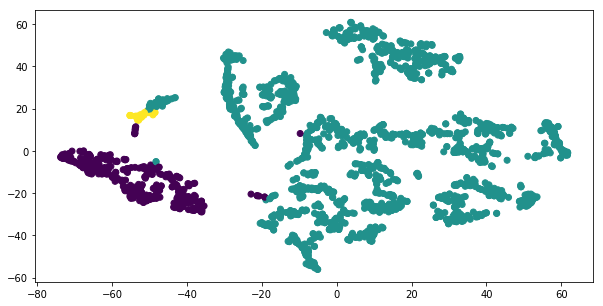

In [56]:
#Grafico de los datos en 2d con las etiquetas
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels) #Se agregan los labels de los clusters
plt.show()

In [ ]:
#Formacion de los clusters a traves del clustering jerarquico aglomerativo